In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=1.5)
sns.set_style("darkgrid", {'axes.grid' : False})   

%matplotlib inline

In [5]:
drive_path = '/Volumes/Brain2016/'

In [6]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

## example code to extract useful stuff, then plot response triggered average image

### get metrics for all cell_specimens in the dataset

In [7]:
#get cell metrics dataframe
cell_specimen_df = pd.DataFrame(boc.get_cell_specimens(ids=None,experiment_container_ids=None))
cell_specimen_df.head()

,area,cell_specimen_id,dsi_dg,experiment_container_id,imaging_depth,osi_dg,osi_sg,p_dg,p_ns,p_sg,...,pref_sf_sg,pref_tf_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,VISpm,517394843,NaN,511498500,275,NaN,0.728590,NaN,2.644073e-05,0.000076,...,0.32,NaN,0.29925,0.19950,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,VISpm,517394850,NaN,511498500,275,NaN,0.899272,NaN,3.568235e-04,0.056579,...,0.32,NaN,0.43225,0.56525,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,VISpm,517394858,0.592835,511498500,275,1.150344,NaN,0.002900,NaN,NaN,...,NaN,8.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,VISpm,517394866,0.599360,511498500,275,0.745139,NaN,0.000004,NaN,NaN,...,NaN,8.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,VISpm,517394870,NaN,511498500,275,NaN,0.599881,NaN,3.334354e-07,0.067868,...,0.02,NaN,0.23275,0.39900,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


### get experiment containers meeting certain criteria

In [8]:
#get experiment_containers meeting certain criteria
expts = boc.get_ophys_experiments(targeted_structures=['VISal'],cre_lines=['Cux2-CreERT2'],
                                  imaging_depths=[275],session_types=['three_session_B'])
expts = pd.DataFrame(expts)
print len(expts),'experiments meet these criteria'
expts.head()

4 experiments meet these criteria


,age_days,cre_line,experiment_container_id,id,imaging_depth,session_type,targeted_structure
0,95.0,Cux2-CreERT2,511854338,512149367,275,three_session_B,VISal
1,111.0,Cux2-CreERT2,511510867,504625475,275,three_session_B,VISal
2,111.0,Cux2-CreERT2,511511052,507691380,275,three_session_B,VISal
3,101.0,Cux2-CreERT2,511856567,511976329,275,three_session_B,VISal


In [9]:
#get experiment session id for the first experiment container
session_id = expts.id.values[2]
print session_id

507691380


### get data_set for one experiment session

In [10]:
#get data for a single experiment session
data_set = boc.get_ophys_experiment_data(ophys_experiment_id = session_id)

In [11]:
#get stimulus template (aka stimulus frames) for images, movies or locally sparse noise
images = data_set.get_stimulus_template(stimulus_name='natural_scenes')
images.shape

(118, 918, 1174)

In [12]:
#get stimulus table
stim_table = data_set.get_stimulus_table('natural_scenes')
stim_table.head()

,frame,start,end
0,61,16098,16105
1,31,16105,16112
2,-1,16113,16120
3,23,16120,16127
4,13,16128,16135


### stimulus specific analysis - natural_scenes

In [13]:
#stimulus specific analysis
from allensdk.brain_observatory.natural_scenes import NaturalScenes
ns = NaturalScenes(data_set)

In [14]:
#sweep_response table - dataframe of dF/F traces for every sweep (rows) for all cells (columns)
#trace includes interlength+sweeplength+interlength
sweep_response = ns.sweep_response

In [15]:
#mean_sweep_response - mean values of traces in sweep_response during stimulus window
#sweep (rows) by cells (columns)
mean_sweep_response = ns.mean_sweep_response 
mean_sweep_response.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,dx
0,1.239534,-4.569200,2.133607,0.350199,1.910965,-5.187878,1.941385,0.942162,3.990125,5.465677,...,-4.414268,2.880325,0.771228,3.048187,4.166623,-1.252966,3.338844,3.460425,6.493255,0.070185
1,1.147364,-2.559313,0.117024,0.330525,2.534506,-7.744832,3.997259,2.265376,4.834355,3.878726,...,-8.000191,0.218351,0.931538,1.181501,3.296246,0.304500,0.837915,2.261983,4.632407,0.077726
2,0.498177,-3.650175,-0.352591,0.775696,3.133458,-3.240655,3.273726,3.751017,3.381362,2.489614,...,-4.037952,0.302121,3.521165,1.657899,2.578620,3.160548,-0.921122,1.607586,4.649961,-0.071751
3,0.532052,-1.935029,-1.342787,0.108970,1.953799,1.164319,0.899869,3.182132,1.449314,2.861508,...,1.188809,2.454684,1.769481,2.243931,-0.095028,5.204735,-0.606980,-1.371195,3.299971,0.009610
4,0.107475,0.266756,-1.565843,-0.742238,-0.843729,0.232575,2.726532,-0.143311,1.412775,-1.159529,...,0.441953,0.531276,-3.324865,-0.404174,-0.962613,5.330327,3.503345,-0.174534,0.838152,-0.012884


In [16]:
#get mean response across conditions (conditions, cells, 3)
#for natural scenes, array is (#scenes, #cells, 3)
#last dimension is, for each condition: mean response, sem, p-value 
condition_response = ns.response
condition_response.shape

(119, 171, 3)

In [17]:
#mean response for all image conditions for cell 
cell = 0
mean_image_responses = condition_response[:,cell,0] #[image,cell,mean]

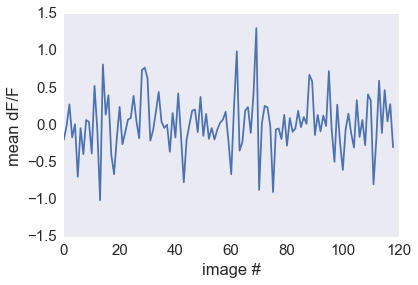

In [18]:
plt.plot(mean_image_responses)
plt.xlabel('image #')
plt.ylabel('mean dF/F')

### find pref image & plot mean response to that image

In [19]:
cell = ns.peak[ns.peak.peak_dff_ns>=3].cell_specimen_id.values[0]
cell

517485965

In [20]:
pref_scene = ns.peak[ns.peak.cell_specimen_id==cell].scene_ns.values[0]
pref_scene

89

In [21]:
pref_scene_sweeps = ns.stim_table[ns.stim_table.frame==pref_scene].index.values
pref_scene_sweeps

array([  58,   68,   69,   75,   79,  262,  358,  556,  564,  824,  990,
       1091, 1160, 1169, 1301, 1449, 1521, 1535, 1660, 1678, 1759, 1769,
       1787, 1810, 1837, 1961, 2025, 2031, 2033, 2221, 2300, 2407, 2771,
       2862, 2960, 3325, 3512, 3655, 3789, 3871, 4236, 4394, 4466, 4697,
       5193, 5194, 5578, 5767, 5880, 5902])

In [22]:
#if the mean of the mean response to the preferred condition is > 5%
responsive_cells = ns.peak[ns.peak.peak_dff_ns>=5].cell_specimen_id.values
len(responsive_cells)

41

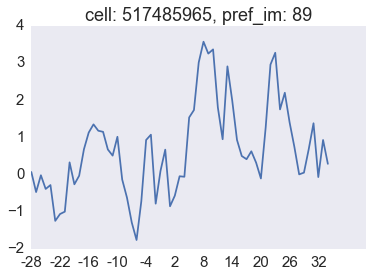

In [23]:
responsive_cell_id = 1
cell_specimen_id = responsive_cells[responsive_cell_id]
cell_idx = np.where(ns.cell_id==cell_specimen_id)[0][0]
pref_scene = ns.peak[ns.peak.cell_specimen_id==cell].scene_ns.values[0]
pref_scene_sweeps = ns.stim_table[ns.stim_table.frame==pref_scene].index.values

condition_mean = ns.sweep_response[str(cell_idx)].iloc[pref_scene_sweeps].mean()
frames = ns.sweeplength+ns.interlength*2
t = np.arange(0,frames)
t_int = np.arange(0,frames,6)
t_int_ref = t_int - ns.interlength 

fig,ax = plt.subplots()
ax.plot(t,condition_mean)
ax.set_xticks(t_int);
ax.set_xticklabels(t_int_ref);
# ax.set_xlabel('time after stimulus onset')
# ax.set_ylabel('dF/F')
ax.set_title('cell: '+str(cell)+', pref_im: '+str(pref_scene))

### make it a function

In [24]:
images = data_set.get_stimulus_template('natural_scenes')

In [25]:
def plot_pref_condition_response(ns,cell_specimen_id,images):
    pref_scene = ns.peak[ns.peak.cell_specimen_id==cell_specimen_id].scene_ns.values[0]
    pref_scene_sweeps = ns.stim_table[ns.stim_table.frame==pref_scene].index.values
#     cell_idx = data_set.get_cell_specimen_indices([cell])[0]
    cell_idx = np.where(ns.cell_id==cell_specimen_id)[0][0]

    condition_mean = ns.sweep_response[str(cell_idx)].iloc[pref_scene_sweeps].mean()
    frames = ns.sweeplength+ns.interlength*2
    t = np.arange(0,frames)
    t_int = np.arange(0,frames,6)
    t_int_ref = t_int - ns.interlength 

    fig,ax = plt.subplots(1,2,figsize=(12,4))
    ax = ax.ravel()
    ax[0].plot(t,condition_mean)
    ax[0].set_xticks(t_int);
    ax[0].set_xlim([np.min(t_int),np.max(t_int)])
    ax[0].set_xticklabels(t_int_ref/30.);
    ax[0].set_xlabel('time after stimulus onset')
    ax[0].set_ylabel('dF/F')
    ax[0].set_title('cell: '+str(cell))
    
    ax[1].imshow(images[pref_scene,:,:],cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('pref image: '+str(pref_scene))

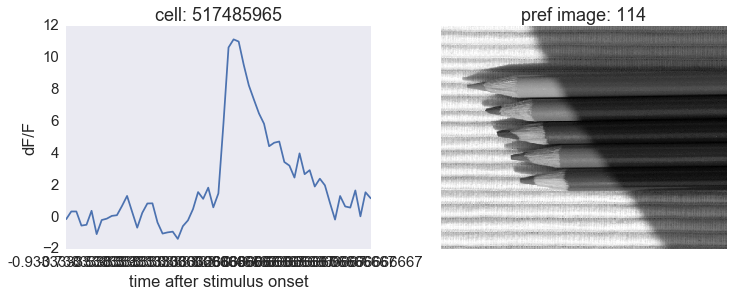

In [26]:
plot_pref_condition_response(ns,cell_specimen_id,images)

### find frames where response was greater than threshold dF/F value and determine which images were shown during those frames, then create response triggered average image, weighted by stength of response during those frames

In [27]:
#for a given cell in the list of responsive cells computed above
responsive_cell_id = 1
cell_specimen_id = responsive_cells[responsive_cell_id]
cell_idx = np.where(ns.cell_id==cell_specimen_id)[0][0]

In [28]:
#get traces for all responsive cells (not all cells in experiment_session)
timestamps,traces = data_set.get_dff_traces(cell_specimen_ids=responsive_cells)

In [29]:
#create array containing just the imaging frames when natural images were shown (frames_arr), 
#and and array of the natural images that were shown for those frames (images_arr)
frames_arr = np.empty(0)
images_arr = np.empty(0)
for sweep in range(len(stim_table)):
    start = stim_table.iloc[sweep].start
    end = stim_table.iloc[sweep].end
    frames = np.arange(start,end+1)
#     print frames.shape
    frames_arr = np.hstack((frames_arr,frames))
    image = stim_table.iloc[sweep].frame
    for i in range(len(frames)):
        images_arr = np.hstack((images_arr,image))

In [30]:
#for all responsive cells, get the dF/F values for frames where natural images were shown
traces_arr = np.empty((traces.shape[0],frames_arr.shape[0]))
for t in range(traces.shape[0]): 
    trace = np.empty(0)
    for sweep in range(len(stim_table)):
        start = stim_table.iloc[sweep].start
        end = stim_table.iloc[sweep].end
        tmp = traces[t,start:end+1]
        trace = np.hstack((trace,tmp))
    traces_arr[t,:] = trace

In [31]:
#get indices where trace response was > threshold dF/F
thresh_inds = np.where(traces_arr[responsive_cell_id,:]>=0.5)[0]
thresh_inds = thresh_inds - 6 #want to look at image present 6 frames prior to response 

In [32]:
#get dF/F values for frames with response > threshold
thresh_vals = traces_arr[responsive_cell_id][thresh_inds]

In [33]:
#get images that were shown on frames where response > threshold
thresh_images = images_arr[thresh_inds]

In [34]:
images.shape

(118, 918, 1174)

In [35]:
#create stack of images that were present when response > threshold
img_stack = np.empty((thresh_images.shape[0],images[0,:,:].shape[0],images[0,:,:].shape[1]))
for i,img in enumerate(thresh_images):
    img_stack[i,:,:] = images[img,:,:]

/Users/marinag/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


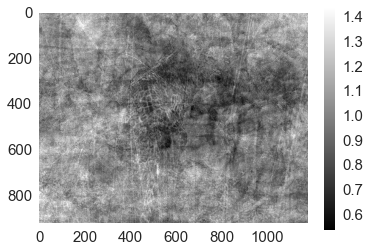

In [36]:
#plot mean of all images that were present prior to cell response, normalized to the mean across all images
mean_image = np.mean(img_stack,axis=0)
all_images_mean = np.mean(images,axis=0)
plt.imshow(mean_image/all_images_mean,cmap='gray')
plt.colorbar()

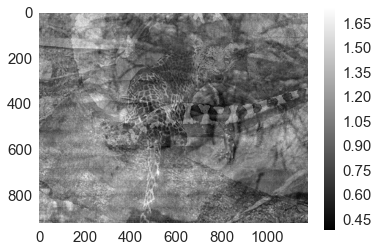

In [38]:
#plot mean image weighted by response magnitude 
weighted_mean_image = np.average(img_stack,axis=0,weights=thresh_vals)
plt.imshow(weighted_mean_image/all_images_mean,cmap='gray')
plt.colorbar()

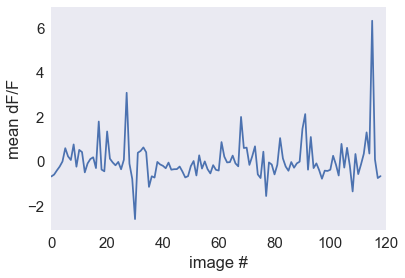

In [39]:
#plot mean response to all images
mean_image_responses = condition_response[:,cell_idx,0] #[image,cell,mean]
plt.plot(mean_image_responses)
plt.xlabel('image #')
plt.ylabel('mean dF/F')

### create functions to get all responsive frames and average the images that were shown prior to those frames

In [40]:
#processing on all traces
def get_ns_response_arrays(data_set):
    timestamps,traces = data_set.get_dff_traces(cell_specimen_ids=responsive_cells)

    frames_arr = np.empty(0)
    images_arr = np.empty(0)
    for sweep in range(len(stim_table)):
        start = stim_table.iloc[sweep].start
        end = stim_table.iloc[sweep].end
        frames = np.arange(start,end)
        frames_arr = np.hstack((frames_arr,frames))
        image = stim_table.iloc[sweep].frame
        for i in range(len(frames)):
            images_arr = np.hstack((images_arr,image))

    traces_arr = np.empty((traces.shape[0],frames_arr.shape[0]))
    for t in range(traces.shape[0]): 
        trace = np.empty(0)
        for sweep in range(len(stim_table)):
            start = stim_table.iloc[sweep].start
            end = stim_table.iloc[sweep].end
            tmp = traces[t,start:end]
            trace = np.hstack((trace,tmp))
        traces_arr[t,:] = trace

    return frames_arr, images_arr, traces_arr     

In [41]:
frames_arr, images_arr, traces_arr = get_ns_response_arrays(data_set)

In [46]:
def plot_ns_summary(cell_specimen_id,responsive_cell_id,ns,images,frames_arr,images_arr,traces_arr,thresh=0.5,weighted=False,save_dir=False): 
    cell_idx = np.where(ns.cell_id==cell_specimen_id)[0][0] 
    
    pref_scene = ns.peak[ns.peak.cell_specimen_id==cell_specimen_id].scene_ns.values[0]
    pref_scene_sweeps = ns.stim_table[ns.stim_table.frame==pref_scene].index.values

    condition_mean = ns.sweep_response[str(cell_idx)].iloc[pref_scene_sweeps].mean()
    condition_sem = np.std(ns.sweep_response[str(cell_idx)].iloc[pref_scene_sweeps].values)/float(len(pref_scene_sweeps))
#     frames = ns.sweeplength+ns.interlength*2
    frames = 63
    t = np.arange(0,frames)
    t_int = np.arange(0,frames,6)
    t_int_ref = t_int - 30

    thresh_inds = np.where(traces_arr[responsive_cell_id,:]>=thresh)[0]
    thresh_inds = thresh_inds - 6
    thresh_vals = traces_arr[responsive_cell_id][thresh_inds]
    thresh_images = images_arr[thresh_inds]
    n_images = len(np.unique(thresh_images))
    img_stack = np.empty((thresh_images.shape[0],images[0,:,:].shape[0],images[0,:,:].shape[1]))
    for i,img in enumerate(thresh_images):
        img_stack[i,:,:] = images[img,:,:]
    if weighted: 
        mean_image = np.average(img_stack,axis=0,weights=thresh_vals)/np.mean(images,axis=0)
    else: 
        mean_image = np.mean(img_stack,axis=0)/np.mean(images,axis=0)

    condition_response = ns.response
    mean_image_responses = condition_response[:,cell_idx,0] #[image,cell,mean]
    sem_image_responses = condition_response[:,cell_idx,1] #[image,cell,mean]
    
    fig,ax = plt.subplots(2,2,figsize=(15,10))
    ax = ax.ravel()
    ax[0].plot(t,condition_mean)
    x = condition_mean
    y1 = condition_mean+condition_sem
    y2 = condition_mean-condition_sem
    ax[0].fill_between(x=np.arange(0,len(x)),y1=y1,y2=y2,alpha=0.5)
    ax[0].set_xticks(t_int);
    ax[0].set_xticklabels(t_int_ref/30.);
    ax[0].set_xlabel('time after stimulus onset')
    ax[0].set_ylabel('dF/F')
    ax[0].set_title('cell '+str(cell_specimen_id)+' mean response to pref condition')

    ax[1].imshow(images[pref_scene,:,:],cmap='gray')
    ax[1].set_title('preferred image: '+str(pref_scene))
    ax[1].axis('off')

    ax[2].plot(mean_image_responses,color='green')
    x = mean_image_responses
    y1 = mean_image_responses+sem_image_responses
    y2 = mean_image_responses-sem_image_responses
    ax[2].fill_between(x=np.arange(0,len(x)),y1=y1,y2=y2,alpha=0.5,color='green')
    ax[2].set_xlabel('image #')
    ax[2].set_ylabel('mean dF/F')
    ax[2].set_title('mean response to all conditions')

    ax[3].imshow(mean_image,cmap='gray')
    ax[3].axis('off')
    if weighted:
        ax[3].set_title('weighted mean of '+str(n_images)+' image conditions')
    else:
        ax[3].set_title('mean of '+str(n_images)+' image conditions')
    plt.tight_layout()
    if save_dir: 
        if not os.path.exists(save_dir):
            os.mkdir(save_dir)
        save_path = os.path.join(save_dir,str(cell_specimen_id)+'.png')
        fig.savefig(save_path)
    # ax[4:5].plot(traces[cell_idx,:])

/Users/marinag/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


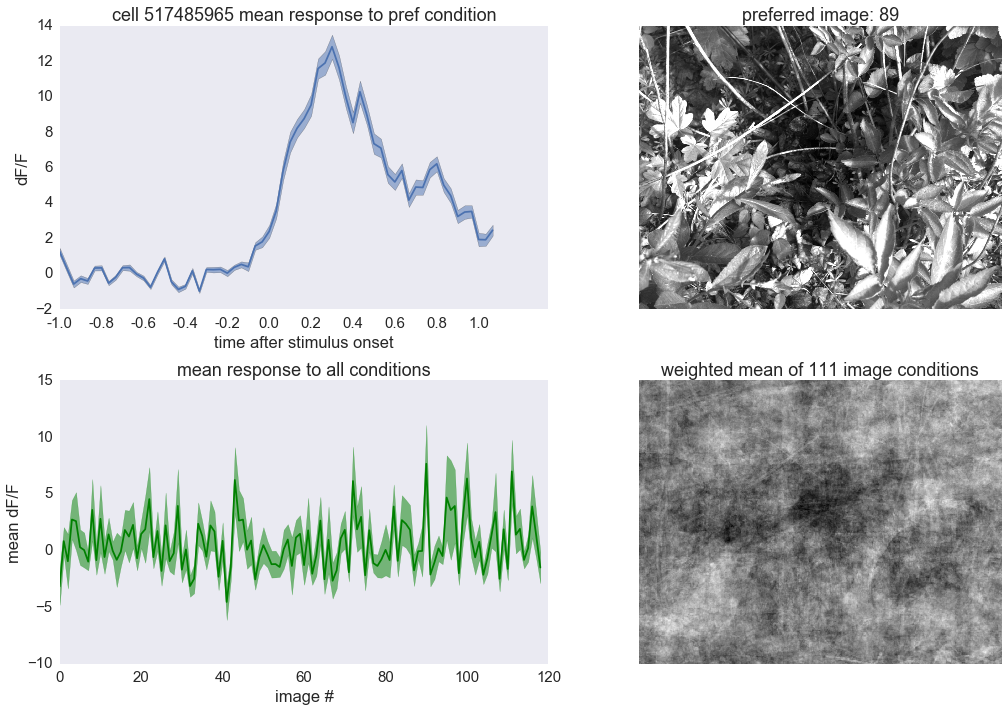

In [50]:
responsive_cell_id = 0
cell_specimen_id = responsive_cells[responsive_cell_id]
plot_ns_summary(cell_specimen_id,responsive_cell_id,ns,images,frames_arr,images_arr,traces_arr,thresh=0.5,weighted=True,save_dir=None)

### plot for all responsive cells & save 

In [ ]:
#plot for all responsive cells in this experiment_session
save_dir = os.path.join(r'/Users/marinag/Data/BrainObservatory/natural_scenes_plots/',str(session_id))
for responsive_cell_id, cell_specimen_id in enumerate(responsive_cells):
    plot_ns_summary(cell_specimen_id,responsive_cell_id,ns,images,frames_arr,images_arr,traces_arr,thresh=0.5,weighted=True,save_dir=save_dir)

### compare population response in natural scenes to drifting gratings

In [ ]:
# #stimulus specific analysis
# from allensdk.brain_observatory.static_gratings import StaticGratings
# sg = StaticGratings(data_set)

In [ ]:
# help(sg)

In [ ]:
# sg_response = np.empty(((6*6*4),sg.response.shape[3]))
# cond = 0 
# for i in range((sg.response.shape[0])):
#     for x in range((sg.response.shape[1])):
#         for y in range((sg.response.shape[2])):
# #             print 'ori:',sg.orivals[i],'sf:',sg.sfvals[x],'phase:',sg.phasevals[y]
#             sg_response[cond,:] = sg.response[i,x,y,:,0]
#             cond +=1

In [ ]:
# fix,ax=plt.subplots(figsize=(15,10))
# ax.pcolormesh(sg_response[:,:],cmap='jet',vmin=0,vmax=20)
# ax.set_title('population response to static gratings')

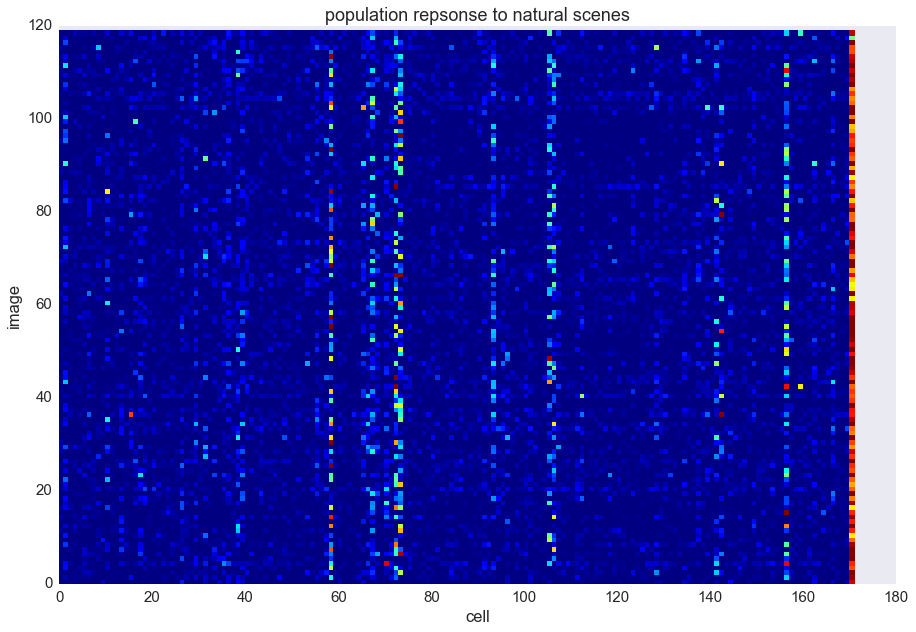

In [51]:
fix,ax=plt.subplots(figsize=(15,10))
ax.pcolormesh(ns.response[:,:,0],cmap='jet',vmin=0,vmax=20)
ax.set_title('population repsonse to natural scenes')
ax.set_xlabel('cell')
ax.set_ylabel('image')